# Task 1 Artificial Neural Network

In [ ]:
## loading all the packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from keras.datasets import cifar10
from keras import Sequential, regularizers
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

### 1.Load the dataset(CIFAR - 10)

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


### 2.Explain in your own words:

**a. Gradient Descent:** Gradient Descent is a backpropagation phase method in which the goal is to continually resample the gradient of the model's parameter in the opposite direction depending on the weight w, updating consistently until the global minimum of function J is reached (w). We are at point A in the loss landscape when we set our weights. The first step is to determine which direction in the x-y plane, out of all conceivable directions, causes the sharpest fall in the loss function's value. This is the path that we must take. This is determined by the direction that is diametrically opposed to the gradient's orientation. The derivative's higher-dimensional cousin, the gradient, provides us with steepest ascent.

**b. Drop Out:** Simply simply, dropout refers to the practice of ignoring units (i.e. neurons) during the training phase of a randomly selected set of neurons. By "ignoring," I mean that these units are not taken into account during a forward or backward pass. Individual nodes are dropped out of the network with probability 1-p or kept with probability p at each training stage, resulting in a smaller network; incoming and outgoing edges to a dropped-out node are likewise eliminated.

**c. Activation Function:** The neural network's input layer accepts data for training in a variety of formats, including pictures, audio, and text. The linear function is calculated using input features with weights and biases from the dataset. The activation function then uses this resultant from the linear function as input, and the calculated activations are then provided as input to the following layer.

**d. Back Propogation:** It's a technique for fine-tuning the weights of a neural network based on the previous epoch's error rate (i.e., iteration). By fine-tuning the weights, you may lower error rates and improve the model's generalization, making it more dependable. Backpropagation is a short form for "backward propagation of mistakes" in a neural network. It's a common way to train artificial neural networks. This method is useful for calculating the gradient of a loss function with respect to all of the network's weights.

**e. Epochs, Iterations and Batch size:**

Epochs :An epoch is a complete transit of the training data through the algorithm. The algorithm's epoch number is a significant hyperparameter. It defines the number of epochs or full passes through the algorithm's training or learning phase for the entire training dataset.

Ierations: The number of times a batch of data has traveled through the algorithm is known as iteration. To put it another way, it's the number of passes, with each pass consisting of one forward and one backward pass.

Batch Size: Before the model is changed, the batch size refers to the number of samples handled. The number of epochs refers to how many times the training dataset has been traversed completely. The number of samples in the training dataset must be less than or equal to the size of a batch, which must be greater than or equal to one.


### 3. Visualize / summarize the data

##### a. Number of entities in training and testing set and number of classes in target variable

In [ ]:
## Entries in training and testing set

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [ ]:
## Number of varaibles in target varaible 

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

##### b. Number of pixels in the image (Height and width individually)


In [ ]:
x_train.shape

(50000, 32, 32, 3)

this indicates that there are 50000 images with 32x32 pixel size with rgb dimension 3. Which is height = 32 and width = 32

##### c. Number of images per class

In [ ]:
print('In train data')
print(np.unique(y_train, return_counts=True))

print('\nIn test data')
print(np.unique(y_test, return_counts=True))

In train data
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In test data
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


We have total 6000 images in each class in entire dataset

##### d. Display at least 2 images of each class

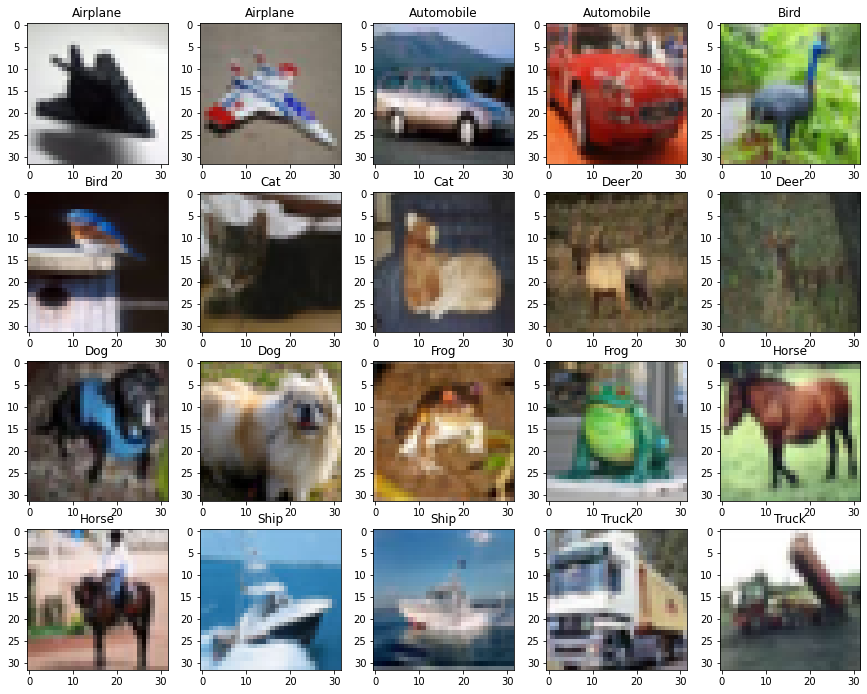

In [ ]:
classes = {0:'Airplane',1:'Automobile',2:'Bird',3:'Cat',4:	'Deer',5:	'Dog',6:	'Frog',7:	'Horse',8:	'Ship',9:	'Truck'}
count, j, k = 0, 0, 0
fig=plt.figure(figsize=(15, 15))
for i in range(10):
  while(1):
    if y_train[j] == i:
      fig.add_subplot(5, 5, k+1)
      plt.imshow(x_train[j],cmap=plt.cm.binary)
      plt.title(classes[i])
      count += 1
      k += 1
    j += 1
    if count == 2:
      break
  j = 0
  count = 0

plt.show()

### 4. Train the neural networks

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train  /= 255
x_test /= 255

x_train = x_train.reshape((x_train.shape[0], 32*32*3))
x_test = x_test.reshape((x_test.shape[0], 32*32*3))

### a. Decide number of layers and neurons in each layer



In [ ]:
model = Sequential(Dense(128, input_shape = (3072,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

### b. Try out different activation functions (explain each one you used)

**sigmoid Function:** Sigmoid takes a real value as input and outputs another value between 0 and 1. It’s easy to work with and has all the nice properties of activation functions: it’s non-linear, continuously differentiable, monotonic, and has a fixed output range.

**Relu:** Rectified Linear Units is a relatively new innovation. It's a deceptively simple formula: max (0,z). It's not linear, despite its name and look, and offers the same benefits as Sigmoid (i.e., the capacity to learn nonlinear functions) but with superior performance.

**Softmax Function:** The Softmax function computes the event's probability distribution over 'n' distinct events. To put it another way, this function calculates the probabilities of each target class across all potential target classes. The probabilities obtained later will be useful in determining the target class for the provided inputs.

**elu:** The ELU (Exponential Linear Unit) is a function that tends to converge cost to zero faster and deliver more accurate results. Unlike other activation functions, ELU has an additional alpha constant that must be positive.


### c.Try with and without using drop out

In [ ]:
## without dropout
model1 = Sequential(Dense(128, input_shape = (3072,), activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(10,activation='softmax'))

##without dropout 
model2 = Sequential(Dense(128, input_shape = (3072,), activation='elu'))
model2.add(Dense(128, activation='elu'))
model2.add(Dense(128,activation='elu'))
model2.add(Dense(10,activation='sigmoid'))

In [ ]:
## with dropout
model3 = Sequential(Dense(128, input_shape = (3072,), activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.125))
model3.add(Dense(128,activation='relu'))
model3.add(Dense(10,activation='sigmoid'))


## with dropout
model4 = Sequential(Dense(128, input_shape = (3072,), activation='elu'))
model4.add(Dense(128, activation='elu'))
model4.add(Dropout(0.125))
model4.add(Dense(128,activation='elu'))
model4.add(Dropout(0.125))
model4.add(Dense(10,activation='softmax'))

### d. Try different regularizations apart from drop out


In [ ]:
## with kernel_regularizer l2
model5 = Sequential(Dense(128,input_shape = (3072,), kernel_regularizer='l2', activation = 'relu' ))
model5.add(Dense(128, activation='relu',kernel_regularizer='l2'))
model5.add(Dense(128,activation='relu',kernel_regularizer='l2'))
model5.add(Dense(10,activation='sigmoid'))


model6 = Sequential(Dense(128,input_shape = (3072,), kernel_regularizer='l2', activation = 'elu' ))
model6.add(Dense(128, activation='elu',kernel_regularizer='l2'))
model6.add(Dense(128,activation='elu',kernel_regularizer='l2'))
model6.add(Dense(10,activation='softmax'))

In [ ]:
## with kernel_regularizer l1
model7 = Sequential(Dense(128,input_shape = (3072,), kernel_regularizer='l1', activation = 'relu' ))
model7.add(Dense(128, activation='relu',kernel_regularizer='l1'))
model7.add(Dense(128,activation='relu',kernel_regularizer='l1'))
model7.add(Dense(10,activation='sigmoid'))


model8 = Sequential(Dense(128,input_shape = (3072,), kernel_regularizer='l1', activation = 'elu' ))
model8.add(Dense(128, activation='elu',kernel_regularizer='l1'))
model8.add(Dense(128,activation='elu',kernel_regularizer='l1'))
model8.add(Dense(10,activation='sigmoid'))

### e. Try different optimization algorithms (such as Gradient Descent, Adam etc.)

In [ ]:
## Creating f1_score function

import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val


### Model1

#### model1 with adam optimizer

In [ ]:
model1.compile(optimizer='adam',loss="categorical_crossentropy", metrics=get_f1)

history1 = model1.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 12s 9ms/step - loss: 1.8914 - get_f1: 0.1048 - val_loss: 1.8463 - val_get_f1: 0.1647
Epoch 2/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.7226 - get_f1: 0.2086 - val_loss: 1.7498 - val_get_f1: 0.2635
Epoch 3/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.6388 - get_f1: 0.2629 - val_loss: 1.6643 - val_get_f1: 0.2579
Epoch 4/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.5808 - get_f1: 0.3008 - val_loss: 1.5712 - val_get_f1: 0.3236
Epoch 5/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.5417 - get_f1: 0.3238 - val_loss: 1.6568 - val_get_f1: 0.3233
Epoch 6/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.5163 - get_f1: 0.3386 - val_loss: 1.5901 - val_get_f1: 0.3122
Epoch 7/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.4842 - get_f1: 0.3571 - val_loss: 1.5629 - val_get_f1: 0.3158
Epoch 8/20
1172/117

In [ ]:
test_loss,test_acc=model1.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.5020 - get_f1: 0.4128
Test accuracy: 0.41277164220809937


#### model1 with SGD optimizer 


In [ ]:
model1.compile(optimizer='SGD',loss="categorical_crossentropy", metrics=get_f1)


history2 = model1.fit(x_train,y_train,  validation_split=0.25,epochs=20)

Epoch 1/20
1172/1172 [==============================] - 7s 5ms/step - loss: 1.1707 - get_f1: 0.5201 - val_loss: 1.4916 - val_get_f1: 0.4383
Epoch 2/20
1172/1172 [==============================] - 6s 5ms/step - loss: 1.1544 - get_f1: 0.5333 - val_loss: 1.5013 - val_get_f1: 0.4339
Epoch 3/20
1172/1172 [==============================] - 5s 5ms/step - loss: 1.1483 - get_f1: 0.5365 - val_loss: 1.4880 - val_get_f1: 0.4486
Epoch 4/20
1172/1172 [==============================] - 6s 5ms/step - loss: 1.1414 - get_f1: 0.5401 - val_loss: 1.5127 - val_get_f1: 0.4376
Epoch 5/20
1172/1172 [==============================] - 5s 4ms/step - loss: 1.1355 - get_f1: 0.5417 - val_loss: 1.5132 - val_get_f1: 0.4430
Epoch 6/20
1172/1172 [==============================] - 5s 4ms/step - loss: 1.1332 - get_f1: 0.5427 - val_loss: 1.5174 - val_get_f1: 0.4423
Epoch 7/20
1172/1172 [==============================] - 6s 5ms/step - loss: 1.1273 - get_f1: 0.5443 - val_loss: 1.5189 - val_get_f1: 0.4398
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model1.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.5409 - get_f1: 0.4528
Test accuracy: 0.45284169912338257


#### model1 with Adamax optimizer

In [ ]:
model1.compile(optimizer='adamax',loss="categorical_crossentropy", metrics=get_f1)


history3 = model1.fit(x_train,y_train,  validation_split=0.25,epochs=20)

Epoch 1/20
1172/1172 [==============================] - 10s 8ms/step - loss: 1.0869 - get_f1: 0.5682 - val_loss: 1.5744 - val_get_f1: 0.4461
Epoch 2/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.0739 - get_f1: 0.5742 - val_loss: 1.5721 - val_get_f1: 0.4458
Epoch 3/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.0688 - get_f1: 0.5741 - val_loss: 1.5789 - val_get_f1: 0.4491
Epoch 4/20
1172/1172 [==============================] - 10s 8ms/step - loss: 1.0640 - get_f1: 0.5778 - val_loss: 1.5600 - val_get_f1: 0.4498
Epoch 5/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.0593 - get_f1: 0.5798 - val_loss: 1.6052 - val_get_f1: 0.4443
Epoch 6/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.0552 - get_f1: 0.5823 - val_loss: 1.5932 - val_get_f1: 0.4507
Epoch 7/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.0526 - get_f1: 0.5820 - val_loss: 1.6073 - val_get_f1: 0.4480
Epoch 8/20
1172/11

In [ ]:
test_loss,test_acc=model1.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.6070 - get_f1: 0.4501
Test accuracy: 0.45006701350212097


### Model2

#### model2 and with adam optimizer 

In [ ]:
model2.compile(optimizer='adam',loss="categorical_crossentropy", metrics=get_f1)

history4 = model2.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.8720 - get_f1: 0.2815 - val_loss: 1.8356 - val_get_f1: 0.2875
Epoch 2/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.6881 - get_f1: 0.2969 - val_loss: 1.6852 - val_get_f1: 0.2966
Epoch 3/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.5965 - get_f1: 0.2961 - val_loss: 1.6260 - val_get_f1: 0.2783
Epoch 4/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.5419 - get_f1: 0.2987 - val_loss: 1.6113 - val_get_f1: 0.2945
Epoch 5/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.5071 - get_f1: 0.3006 - val_loss: 1.6082 - val_get_f1: 0.3116
Epoch 6/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.4680 - get_f1: 0.3014 - val_loss: 1.5176 - val_get_f1: 0.2900
Epoch 7/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.4343 - get_f1: 0.3019 - val_loss: 1.5304 - val_get_f1: 0.3019
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model2.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.5592 - get_f1: 0.3111
Test accuracy: 0.3111017644405365


#### model2 with Stocastic Gradient descent optimizer 

In [ ]:
model2.compile(optimizer='SGD',loss="categorical_crossentropy", metrics=get_f1)

history5 = model2.fit(x_train,y_train,  validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.9879 - get_f1: 0.3276 - val_loss: 1.5030 - val_get_f1: 0.3104
Epoch 2/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.9523 - get_f1: 0.3273 - val_loss: 1.5258 - val_get_f1: 0.3113
Epoch 3/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.9379 - get_f1: 0.3277 - val_loss: 1.5446 - val_get_f1: 0.3075
Epoch 4/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.9287 - get_f1: 0.3259 - val_loss: 1.5528 - val_get_f1: 0.3081
Epoch 5/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.9204 - get_f1: 0.3252 - val_loss: 1.5854 - val_get_f1: 0.3084
Epoch 6/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.9138 - get_f1: 0.3254 - val_loss: 1.5708 - val_get_f1: 0.3055
Epoch 7/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.9065 - get_f1: 0.3237 - val_loss: 1.5906 - val_get_f1: 0.3060
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model2.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.6959 - get_f1: 0.3045
Test accuracy: 0.30452901124954224


#### model2 with Adamax 

In [ ]:
model2.compile(optimizer='adamax',loss="categorical_crossentropy", metrics=get_f1)

history6 = model2.fit(x_train,y_train,  validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 10s 8ms/step - loss: 0.8622 - get_f1: 0.3175 - val_loss: 1.7154 - val_get_f1: 0.2995
Epoch 2/20
1172/1172 [==============================] - 9s 8ms/step - loss: 0.8458 - get_f1: 0.3160 - val_loss: 1.7549 - val_get_f1: 0.2968
Epoch 3/20
1172/1172 [==============================] - 9s 7ms/step - loss: 0.8373 - get_f1: 0.3145 - val_loss: 1.7517 - val_get_f1: 0.2947
Epoch 4/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.8290 - get_f1: 0.3125 - val_loss: 1.7569 - val_get_f1: 0.2940
Epoch 5/20
1172/1172 [==============================] - 9s 7ms/step - loss: 0.8202 - get_f1: 0.3123 - val_loss: 1.7842 - val_get_f1: 0.2937
Epoch 6/20
1172/1172 [==============================] - 9s 8ms/step - loss: 0.8115 - get_f1: 0.3106 - val_loss: 1.7748 - val_get_f1: 0.2932
Epoch 7/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.8067 - get_f1: 0.3101 - val_loss: 1.7796 - val_get_f1: 0.2880
Epoch 8/20
1172/117

In [ ]:
test_loss,test_acc=model2.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.9689 - get_f1: 0.2856
Test accuracy: 0.28559935092926025


### Model3

#### model3 with adam optimizer

In [ ]:
model3.compile(optimizer='adam',loss="categorical_crossentropy", metrics=get_f1)

history7 = model3.fit(x_train,y_train,  validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 9s 7ms/step - loss: 1.9261 - get_f1: 0.2973 - val_loss: 1.8068 - val_get_f1: 0.3232
Epoch 2/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.7549 - get_f1: 0.3282 - val_loss: 1.7390 - val_get_f1: 0.3242
Epoch 3/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.6913 - get_f1: 0.3383 - val_loss: 1.7122 - val_get_f1: 0.3374
Epoch 4/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.6430 - get_f1: 0.3431 - val_loss: 1.6300 - val_get_f1: 0.3465
Epoch 5/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.6059 - get_f1: 0.3485 - val_loss: 1.6494 - val_get_f1: 0.3431
Epoch 6/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.5761 - get_f1: 0.3566 - val_loss: 1.5834 - val_get_f1: 0.3520
Epoch 7/20
1172/1172 [==============================] - 9s 7ms/step - loss: 1.5501 - get_f1: 0.3601 - val_loss: 1.6261 - val_get_f1: 0.3473
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model3.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.5155 - get_f1: 0.3893
Test accuracy: 0.3892556428909302


#### model3 with SGD optimizer

In [ ]:
model3.compile(optimizer='SGD',loss="categorical_crossentropy", metrics=get_f1)

history8 = model3.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 8s 6ms/step - loss: 1.2955 - get_f1: 0.4080 - val_loss: 1.4654 - val_get_f1: 0.3870
Epoch 2/20
1172/1172 [==============================] - 8s 6ms/step - loss: 1.2813 - get_f1: 0.4097 - val_loss: 1.4685 - val_get_f1: 0.3883
Epoch 3/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.2773 - get_f1: 0.4090 - val_loss: 1.4603 - val_get_f1: 0.3870
Epoch 4/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.2733 - get_f1: 0.4083 - val_loss: 1.4605 - val_get_f1: 0.3840
Epoch 5/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.2703 - get_f1: 0.4073 - val_loss: 1.4607 - val_get_f1: 0.3806
Epoch 6/20
1172/1172 [==============================] - 6s 5ms/step - loss: 1.2677 - get_f1: 0.4071 - val_loss: 1.4702 - val_get_f1: 0.3807
Epoch 7/20
1172/1172 [==============================] - 6s 5ms/step - loss: 1.2627 - get_f1: 0.4082 - val_loss: 1.4624 - val_get_f1: 0.3850
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model3.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.4416 - get_f1: 0.3862
Test accuracy: 0.3862099051475525


#### model3 with adamax 

In [ ]:
model3.compile(optimizer='adamax',loss="categorical_crossentropy", metrics=get_f1)

history9 =model3.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 9s 7ms/step - loss: 1.2479 - get_f1: 0.4152 - val_loss: 1.4753 - val_get_f1: 0.3886
Epoch 2/20
1172/1172 [==============================] - 9s 7ms/step - loss: 1.2422 - get_f1: 0.4183 - val_loss: 1.4679 - val_get_f1: 0.3894
Epoch 3/20
1172/1172 [==============================] - 9s 7ms/step - loss: 1.2384 - get_f1: 0.4217 - val_loss: 1.4707 - val_get_f1: 0.3886
Epoch 4/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.2370 - get_f1: 0.4239 - val_loss: 1.4716 - val_get_f1: 0.3916
Epoch 5/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.2406 - get_f1: 0.4274 - val_loss: 1.4822 - val_get_f1: 0.3981
Epoch 6/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.2268 - get_f1: 0.4331 - val_loss: 1.4706 - val_get_f1: 0.3981
Epoch 7/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.2250 - get_f1: 0.4360 - val_loss: 1.4758 - val_get_f1: 0.4035
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model3.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.4593 - get_f1: 0.4386
Test accuracy: 0.4386318325996399


### Model4

#### model4 with adam optimizer

In [ ]:
model4.compile(optimizer='adam',loss="categorical_crossentropy", metrics=get_f1)

history10 = model4.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 9s 7ms/step - loss: 1.9407 - get_f1: 0.1259 - val_loss: 1.7625 - val_get_f1: 0.2109
Epoch 2/20
1172/1172 [==============================] - 9s 7ms/step - loss: 1.7357 - get_f1: 0.2220 - val_loss: 1.6947 - val_get_f1: 0.2616
Epoch 3/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.6415 - get_f1: 0.2773 - val_loss: 1.6864 - val_get_f1: 0.2833
Epoch 4/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.5884 - get_f1: 0.3064 - val_loss: 1.6101 - val_get_f1: 0.2736
Epoch 5/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.5515 - get_f1: 0.3258 - val_loss: 1.5325 - val_get_f1: 0.3291
Epoch 6/20
1172/1172 [==============================] - 9s 7ms/step - loss: 1.5201 - get_f1: 0.3452 - val_loss: 1.5786 - val_get_f1: 0.3207
Epoch 7/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.4937 - get_f1: 0.3658 - val_loss: 1.5774 - val_get_f1: 0.3743
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model4.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.4584 - get_f1: 0.4300
Test accuracy: 0.43004801869392395


#### model4 with SGD optimizer

In [ ]:
model4.compile(optimizer='SGD',loss="categorical_crossentropy", metrics=get_f1)

history11 = model4.fit(x_train,y_train,  validation_split=0.25,epochs=20)

Epoch 1/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.1830 - get_f1: 0.5180 - val_loss: 1.3832 - val_get_f1: 0.4652
Epoch 2/20
1172/1172 [==============================] - 8s 6ms/step - loss: 1.1568 - get_f1: 0.5362 - val_loss: 1.3854 - val_get_f1: 0.4691
Epoch 3/20
1172/1172 [==============================] - 8s 6ms/step - loss: 1.1521 - get_f1: 0.5388 - val_loss: 1.4069 - val_get_f1: 0.4755
Epoch 4/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.1450 - get_f1: 0.5421 - val_loss: 1.3888 - val_get_f1: 0.4758
Epoch 5/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.1412 - get_f1: 0.5431 - val_loss: 1.3884 - val_get_f1: 0.4843
Epoch 6/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.1386 - get_f1: 0.5431 - val_loss: 1.3927 - val_get_f1: 0.4751
Epoch 7/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.1351 - get_f1: 0.5452 - val_loss: 1.3965 - val_get_f1: 0.4786
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model4.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.3887 - get_f1: 0.4795
Test accuracy: 0.47945570945739746


#### model4 with adamax 

In [ ]:
model4.compile(optimizer='adamax',loss="categorical_crossentropy", metrics=get_f1)

history12 = model4.fit(x_train,y_train, validation_split=0.25,epochs=20)

Epoch 1/20
1172/1172 [==============================] - 9s 7ms/step - loss: 1.9298 - get_f1: 0.1092 - val_loss: 1.7637 - val_get_f1: 0.1645
Epoch 2/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.7245 - get_f1: 0.2194 - val_loss: 1.6591 - val_get_f1: 0.2421
Epoch 3/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.6417 - get_f1: 0.2742 - val_loss: 1.6089 - val_get_f1: 0.2644
Epoch 4/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.5810 - get_f1: 0.3144 - val_loss: 1.5441 - val_get_f1: 0.3315
Epoch 5/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.5362 - get_f1: 0.3369 - val_loss: 1.5300 - val_get_f1: 0.3404
Epoch 6/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.4954 - get_f1: 0.3612 - val_loss: 1.4763 - val_get_f1: 0.3682
Epoch 7/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.4641 - get_f1: 0.3802 - val_loss: 1.4970 - val_get_f1: 0.3582
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model4.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 1.3469 - get_f1: 0.4894
Test accuracy: 0.48937058448791504


### Model5

#### model5 with adam

In [ ]:
model5.compile(optimizer='adam',loss="categorical_crossentropy", metrics=get_f1)

history13 = model5.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 10s 8ms/step - loss: 2.4655 - get_f1: 0.2774 - val_loss: 2.0586 - val_get_f1: 0.2889
Epoch 2/20
1172/1172 [==============================] - 10s 8ms/step - loss: 2.0058 - get_f1: 0.2997 - val_loss: 2.0290 - val_get_f1: 0.2915
Epoch 3/20
1172/1172 [==============================] - 9s 8ms/step - loss: 1.9621 - get_f1: 0.3072 - val_loss: 1.9741 - val_get_f1: 0.3133
Epoch 4/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.9489 - get_f1: 0.3125 - val_loss: 1.9386 - val_get_f1: 0.3173
Epoch 5/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.9363 - get_f1: 0.3166 - val_loss: 2.0206 - val_get_f1: 0.3043
Epoch 6/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.9299 - get_f1: 0.3202 - val_loss: 1.9663 - val_get_f1: 0.3127
Epoch 7/20
1172/1172 [==============================] - 10s 9ms/step - loss: 1.9213 - get_f1: 0.3237 - val_loss: 1.9189 - val_get_f1: 0.3214
Epoch 8/20
1172/1

In [ ]:
test_loss,test_acc=model5.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.8759 - get_f1: 0.3448
Test accuracy: 0.3448324203491211


#### model5 with SDG

In [ ]:
model5.compile(optimizer='SGD',loss="categorical_crossentropy", metrics=get_f1)

history14 = model5.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 9s 7ms/step - loss: 1.8045 - get_f1: 0.3644 - val_loss: 1.7919 - val_get_f1: 0.3665
Epoch 2/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.7955 - get_f1: 0.3671 - val_loss: 1.8961 - val_get_f1: 0.3571
Epoch 3/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.7902 - get_f1: 0.3687 - val_loss: 1.8040 - val_get_f1: 0.3686
Epoch 4/20
1172/1172 [==============================] - 9s 7ms/step - loss: 1.7921 - get_f1: 0.3685 - val_loss: 1.8205 - val_get_f1: 0.3658
Epoch 5/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.7898 - get_f1: 0.3692 - val_loss: 1.7843 - val_get_f1: 0.3757
Epoch 6/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.7904 - get_f1: 0.3691 - val_loss: 1.8930 - val_get_f1: 0.3494
Epoch 7/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.7869 - get_f1: 0.3707 - val_loss: 1.7962 - val_get_f1: 0.3670
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model5.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.7608 - get_f1: 0.3784
Test accuracy: 0.37844014167785645


#### model5 with adamax

In [ ]:
model5.compile(optimizer='adamax',loss="categorical_crossentropy", metrics=get_f1)

history15 = model5.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 9s 7ms/step - loss: 1.7643 - get_f1: 0.3755 - val_loss: 1.8056 - val_get_f1: 0.3620
Epoch 2/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.7625 - get_f1: 0.3754 - val_loss: 1.8037 - val_get_f1: 0.3740
Epoch 3/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.7594 - get_f1: 0.3782 - val_loss: 1.7908 - val_get_f1: 0.3783
Epoch 4/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.7597 - get_f1: 0.3784 - val_loss: 1.7873 - val_get_f1: 0.3765
Epoch 5/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.7561 - get_f1: 0.3791 - val_loss: 1.7666 - val_get_f1: 0.3762
Epoch 6/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.7524 - get_f1: 0.3820 - val_loss: 1.7963 - val_get_f1: 0.3747
Epoch 7/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.7539 - get_f1: 0.3815 - val_loss: 1.7792 - val_get_f1: 0.3784
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model5.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.7380 - get_f1: 0.3914
Test accuracy: 0.3913521468639374


### Model6

#### model6 with adam

In [ ]:
model6.compile(optimizer='adam',loss="categorical_crossentropy", metrics=get_f1)

history16 = model6.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 8s 6ms/step - loss: 2.9465 - get_f1: 0.0501 - val_loss: 2.0837 - val_get_f1: 0.0859
Epoch 2/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.0375 - get_f1: 0.0647 - val_loss: 2.0151 - val_get_f1: 0.0589
Epoch 3/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.9900 - get_f1: 0.0843 - val_loss: 1.9622 - val_get_f1: 0.0592
Epoch 4/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.9689 - get_f1: 0.1015 - val_loss: 1.9574 - val_get_f1: 0.0953
Epoch 5/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.9626 - get_f1: 0.1055 - val_loss: 1.9429 - val_get_f1: 0.1326
Epoch 6/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.9451 - get_f1: 0.1167 - val_loss: 2.0602 - val_get_f1: 0.1787
Epoch 7/20
1172/1172 [==============================] - 9s 7ms/step - loss: 1.9348 - get_f1: 0.1279 - val_loss: 1.9177 - val_get_f1: 0.1154
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model6.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.8826 - get_f1: 0.1495
Test accuracy: 0.14946876466274261


#### model6 with SGD

In [ ]:
model6.compile(optimizer='SGD',loss="categorical_crossentropy", metrics=get_f1)

history17 = model6.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 8s 6ms/step - loss: 1.8454 - get_f1: 0.1656 - val_loss: 1.9296 - val_get_f1: 0.2059
Epoch 2/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8341 - get_f1: 0.1712 - val_loss: 1.8775 - val_get_f1: 0.1824
Epoch 3/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8285 - get_f1: 0.1762 - val_loss: 1.8476 - val_get_f1: 0.1893
Epoch 4/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8229 - get_f1: 0.1781 - val_loss: 1.8292 - val_get_f1: 0.1846
Epoch 5/20
1172/1172 [==============================] - 6s 5ms/step - loss: 1.8229 - get_f1: 0.1784 - val_loss: 1.8446 - val_get_f1: 0.1894
Epoch 6/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8216 - get_f1: 0.1814 - val_loss: 1.8509 - val_get_f1: 0.1403
Epoch 7/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8187 - get_f1: 0.1834 - val_loss: 1.9044 - val_get_f1: 0.1535
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model6.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.8126 - get_f1: 0.1865
Test accuracy: 0.18645574152469635


#### model6 with adamax

In [ ]:
model6.compile(optimizer='adamax',loss="categorical_crossentropy", metrics=get_f1)

history18 = model6.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.8078 - get_f1: 0.1923 - val_loss: 1.8213 - val_get_f1: 0.1624
Epoch 2/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8070 - get_f1: 0.1917 - val_loss: 1.8196 - val_get_f1: 0.1926
Epoch 3/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.8011 - get_f1: 0.1930 - val_loss: 1.8206 - val_get_f1: 0.2105
Epoch 4/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.7908 - get_f1: 0.2016 - val_loss: 1.8102 - val_get_f1: 0.1842
Epoch 5/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.7911 - get_f1: 0.2065 - val_loss: 1.8290 - val_get_f1: 0.1664
Epoch 6/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.7900 - get_f1: 0.2030 - val_loss: 1.8074 - val_get_f1: 0.2060
Epoch 7/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.7891 - get_f1: 0.2076 - val_loss: 1.8225 - val_get_f1: 0.1793
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model6.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.8359 - get_f1: 0.1948
Test accuracy: 0.19478386640548706


### Model7

#### model7 with adam

In [ ]:
model7.compile(optimizer='adam',loss="categorical_crossentropy", metrics=get_f1)

history19 = model7.fit(x_train,y_train,  validation_split=0.25,epochs=20)

Epoch 1/20
1172/1172 [==============================] - 9s 8ms/step - loss: 5.1736 - get_f1: 0.1706 - val_loss: 2.7865 - val_get_f1: 0.1703
Epoch 2/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7866 - get_f1: 0.1668 - val_loss: 2.7868 - val_get_f1: 0.1699
Epoch 3/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7867 - get_f1: 0.1668 - val_loss: 2.7877 - val_get_f1: 0.1702
Epoch 4/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7867 - get_f1: 0.1655 - val_loss: 2.7872 - val_get_f1: 0.1463
Epoch 5/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7868 - get_f1: 0.1605 - val_loss: 2.7864 - val_get_f1: 0.1648
Epoch 6/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7868 - get_f1: 0.1636 - val_loss: 2.7871 - val_get_f1: 0.1737
Epoch 7/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7868 - get_f1: 0.1646 - val_loss: 2.7874 - val_get_f1: 0.1646
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model7.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.7863 - get_f1: 0.1601
Test accuracy: 0.16006390750408173


#### model7 with SGD

In [ ]:
model7.compile(optimizer='SGD',loss="categorical_crossentropy", metrics=get_f1)

history20 = model7.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.5160 - get_f1: 0.1523 - val_loss: 2.5128 - val_get_f1: 0.1641
Epoch 2/20
1172/1172 [==============================] - 7s 6ms/step - loss: 2.5157 - get_f1: 0.1562 - val_loss: 2.5127 - val_get_f1: 0.1568
Epoch 3/20
1172/1172 [==============================] - 7s 6ms/step - loss: 2.5157 - get_f1: 0.1641 - val_loss: 2.5127 - val_get_f1: 0.1467
Epoch 4/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.5157 - get_f1: 0.1642 - val_loss: 2.5128 - val_get_f1: 0.1568
Epoch 5/20
1172/1172 [==============================] - 7s 6ms/step - loss: 2.5157 - get_f1: 0.1552 - val_loss: 2.5128 - val_get_f1: 0.1648
Epoch 6/20
1172/1172 [==============================] - 7s 6ms/step - loss: 2.5157 - get_f1: 0.1592 - val_loss: 2.5128 - val_get_f1: 0.1568
Epoch 7/20
1172/1172 [==============================] - 7s 6ms/step - loss: 2.5157 - get_f1: 0.1627 - val_loss: 2.5128 - val_get_f1: 0.1647
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model7.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 2.5126 - get_f1: 0.1666
Test accuracy: 0.16663336753845215


#### model7 with adamax

In [ ]:
model7.compile(optimizer='adamax',loss="categorical_crossentropy", metrics=get_f1)

history21 = model7.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 9s 7ms/step - loss: 2.7632 - get_f1: 0.1481 - val_loss: 3.0298 - val_get_f1: 0.1467
Epoch 2/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7513 - get_f1: 0.1291 - val_loss: 2.7298 - val_get_f1: 0.1292
Epoch 3/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7508 - get_f1: 0.1385 - val_loss: 2.7225 - val_get_f1: 0.0953
Epoch 4/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7511 - get_f1: 0.1237 - val_loss: 2.6696 - val_get_f1: 0.0953
Epoch 5/20
1172/1172 [==============================] - 7s 6ms/step - loss: 2.7510 - get_f1: 0.1050 - val_loss: 2.5511 - val_get_f1: 0.0953
Epoch 6/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7508 - get_f1: 0.1050 - val_loss: 2.6383 - val_get_f1: 0.0953
Epoch 7/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7509 - get_f1: 0.1137 - val_loss: 2.8445 - val_get_f1: 0.0953
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model7.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.6775 - get_f1: 0.0000e+00
Test accuracy: 0.0


### Model8

#### model8 with adam

In [ ]:
model8.compile(optimizer='adam',loss="categorical_crossentropy", metrics=get_f1)

history22 = model8.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 9s 7ms/step - loss: 5.7572 - get_f1: 0.1691 - val_loss: 2.7605 - val_get_f1: 0.1727
Epoch 2/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7615 - get_f1: 0.1666 - val_loss: 2.7638 - val_get_f1: 0.1667
Epoch 3/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7623 - get_f1: 0.1657 - val_loss: 2.7645 - val_get_f1: 0.1602
Epoch 4/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7622 - get_f1: 0.1662 - val_loss: 2.7630 - val_get_f1: 0.1668
Epoch 5/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7620 - get_f1: 0.1647 - val_loss: 2.7593 - val_get_f1: 0.1617
Epoch 6/20
1172/1172 [==============================] - 8s 6ms/step - loss: 2.7616 - get_f1: 0.1631 - val_loss: 2.7608 - val_get_f1: 0.1578
Epoch 7/20
1172/1172 [==============================] - 8s 6ms/step - loss: 2.7615 - get_f1: 0.1633 - val_loss: 2.7589 - val_get_f1: 0.1671
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model8.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.7626 - get_f1: 0.1666
Test accuracy: 0.16660010814666748


#### model8 with SGD

In [ ]:
model8.compile(optimizer='SGD',loss="categorical_crossentropy", metrics=get_f1)

history23 = model8.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 8s 6ms/step - loss: 2.5161 - get_f1: 0.1627 - val_loss: 2.5145 - val_get_f1: 0.1641
Epoch 2/20
1172/1172 [==============================] - 7s 6ms/step - loss: 2.5157 - get_f1: 0.1658 - val_loss: 2.5145 - val_get_f1: 0.1641
Epoch 3/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.5157 - get_f1: 0.1648 - val_loss: 2.5145 - val_get_f1: 0.1577
Epoch 4/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.5157 - get_f1: 0.1677 - val_loss: 2.5145 - val_get_f1: 0.1704
Epoch 5/20
1172/1172 [==============================] - 7s 6ms/step - loss: 2.5157 - get_f1: 0.1673 - val_loss: 2.5145 - val_get_f1: 0.1643
Epoch 6/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.5157 - get_f1: 0.1681 - val_loss: 2.5145 - val_get_f1: 0.1694
Epoch 7/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.5157 - get_f1: 0.1688 - val_loss: 2.5144 - val_get_f1: 0.1697
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model8.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.5143 - get_f1: 0.1714
Test accuracy: 0.17143994569778442


#### model8 with adamax

In [ ]:
model8.compile(optimizer='adamax',loss="categorical_crossentropy", metrics=get_f1)

history24 = model8.fit(x_train,y_train, validation_split=0.25, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 9s 7ms/step - loss: 2.7646 - get_f1: 0.1616 - val_loss: 3.0210 - val_get_f1: 0.1483
Epoch 2/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7525 - get_f1: 0.1544 - val_loss: 2.7320 - val_get_f1: 0.1650
Epoch 3/20
1172/1172 [==============================] - 8s 6ms/step - loss: 2.7519 - get_f1: 0.1440 - val_loss: 2.7220 - val_get_f1: 0.1467
Epoch 4/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7523 - get_f1: 0.1387 - val_loss: 2.6740 - val_get_f1: 0.1332
Epoch 5/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7521 - get_f1: 0.1113 - val_loss: 2.5583 - val_get_f1: 0.1299
Epoch 6/20
1172/1172 [==============================] - 7s 6ms/step - loss: 2.7518 - get_f1: 0.1203 - val_loss: 2.6422 - val_get_f1: 0.1299
Epoch 7/20
1172/1172 [==============================] - 8s 7ms/step - loss: 2.7519 - get_f1: 0.1036 - val_loss: 2.8415 - val_get_f1: 0.0953
Epoch 8/20
1172/1172

In [ ]:
test_loss,test_acc=model8.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.6833 - get_f1: 0.0000e+00
Test accuracy: 0.0


### f. Create a graph of f1 score vs epochs for training and validation set.

#### the best accuracy is 0.46 with the model having dropout and activation functions as elu and softmax and optimizer adamax

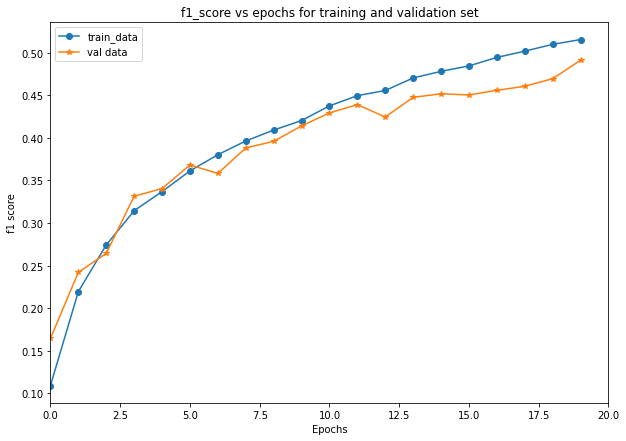

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history12.history['get_f1'], marker = 'o', label='train_data')
plt.plot(history12.history['val_get_f1'], marker = '*', label='val data')
plt.xlabel('Epochs')
plt.ylabel('f1 score')
plt.xlim([0, 20])
plt.title('f1_score vs epochs for training and validation set')
plt.legend()

### g. Calculate number of trainable parameters in your final model.

In [ ]:
print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               393344    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 427,658
Trainable params: 427,658
Non-tr

# Task 2 Natural Language Processing

In [ ]:
import pandas as pd 
import numpy as np
import string 
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
import re
import nltk
import string
from tqdm import tqdm
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
from gensim.models.word2vec import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import scale, MaxAbsScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 1. Load the movie reviews sentiment analysis dataset and split into 80:20 ratio for training and test date

In [ ]:
sndata = pd.read_csv('/content/drive/MyDrive/SNDataset.csv')

In [ ]:
sndata.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### 2. What is lexical vs semantic text analysis

**lexical:** It entails recognizing and analyzing word structures. The collection of words and phrases in a language is referred to as the lexicon. Lexical analysis is the process of breaking down a text file into paragraphs, phrases, and words. The collection of words and phrases in a language is referred to as the lexicon. Lexical analysis is the process of breaking down a text file into paragraphs, phrases, and words. Furthermore, what does lexical analysis imply? An examination of the vocabulary.


**Semantic Analysis:** Semantic analysis is a branch of natural language processing and machine learning that aids in deciphering the context of any text as well as the emotions expressed in the sentence. This aids in the extraction of essential data from computers with human-level precision. Machine translations, chatbots, search engines, and text analytics all use semantic analysis.

### Perform required preprocessing on the dataset (removing stop words, vectorization etc.)

In [ ]:
### writing a function to remove html tags and special characters

def text_preprocess(sentence):

  ## removing html tags first 
  soup = BeautifulSoup(sentence, "html.parser")
  sentence = soup.get_text()

  ## removing all the special characters 
  sen_wo_sc = [x for x in sentence if x not in string.punctuation]
  sen_wo_sc = ''.join(sen_wo_sc)

  ## converting the text into lower case
  sen_wo_sc = sen_wo_sc.lower()

  return sen_wo_sc 

In [ ]:
sndata['review'] = sndata['review'].apply(text_preprocess)

In [ ]:
sndata.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [ ]:
## Removing urls 
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


In [ ]:
sndata['review'] = sndata['review'].apply(remove_urls)
sndata.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [ ]:
## performing text lemmatization 

def text_lemmatization(sentence):
  lemmatizer = WordNetLemmatizer()
  text = [lemmatizer.lemmatize(x) for x in sentence.split()]
  text = ' '.join(text)
  return text

sndata['review'] = sndata['review'].apply(text_lemmatization)

In [ ]:
sndata.head()

,review,sentiment
0,one of the other reviewer ha mentioned that af...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this wa a wonderful way to spend tim...,positive
3,basically there a family where a little boy ja...,negative
4,petter matteis love in the time of money is a ...,positive


In [ ]:
### removing the stop words 
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')
def remove_stop_words(sentence):

  tokens = tokenizer.tokenize(sentence)
  tokens = [token.strip() for token in tokens]

  filtered_token = [token for token in tokens if token not in stopword_list]

  filtered_text = ' '.join(filtered_token)

  return filtered_text

sndata['review'] = sndata['review'].apply(remove_stop_words)

In [ ]:
sndata['review'].head()

0    one reviewer ha mentioned watching 1 oz episod...
1    wonderful little production filming technique ...
2    thought wa wonderful way spend time hot summer...
3    basically family little boy jake think zombie ...
4    petter matteis love time money visually stunni...
Name: review, dtype: object

In [ ]:
# Splitting into train and test
x_train, x_test, y_train, y_test = train_test_split(sndata['review'], sndata["sentiment"], test_size = 0.2)

#### Count Vectorizer 

In [ ]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

##### LogisticRegression using CountVectorize

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)


y_pred_test = lr.predict(x_test)
print(classification_report(y_test,y_pred_test))
print('accuracy_Score:',accuracy_score(y_test,y_pred_test))

              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      4998
    positive       0.88      0.89      0.89      5002

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

accuracy_Score: 0.8868


##### RandomForest using CountVectorize

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_test = rf.predict(x_test)
print(classification_report(y_test,y_pred_test))
print('accuracy_Score:',accuracy_score(y_test,y_pred_test))

              precision    recall  f1-score   support

    negative       0.86      0.85      0.86      4998
    positive       0.86      0.86      0.86      5002

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

accuracy_Score: 0.8586


##### XGBoost usinf CountVectorize


In [ ]:
xg = xgb.XGBClassifier()
xg.fit(x_train,y_train)

y_pred_test = xg.predict(x_test)
print(classification_report(y_test,y_pred_test))
print('accuracy_Score:',accuracy_score(y_test,y_pred_test))

              precision    recall  f1-score   support

    negative       0.85      0.73      0.79      4998
    positive       0.76      0.87      0.81      5002

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000

accuracy_Score: 0.8005


##### usinf Tf-idf vectorizer

In [ ]:
# Splitting into train and test
x_train, x_test, y_train, y_test = train_test_split(sndata['review'], sndata["sentiment"], test_size = 0.2)

In [ ]:
tfidf=TfidfVectorizer(max_features=5000)

x_train=tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

##### LogisticRegression Using tfidf

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred_test = lr.predict(x_test)  
print(classification_report(y_test,y_pred_test))
print('accuracy_Score:',accuracy_score(y_test,y_pred_test))

              precision    recall  f1-score   support

    negative       0.89      0.88      0.88      4919
    positive       0.88      0.89      0.89      5081

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

accuracy_Score: 0.8846


##### RandomForestClassifier using tfidf

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_test = rf.predict(x_test)  
print(classification_report(y_test,y_pred_test))
print('accuracy_Score:',accuracy_score(y_test,y_pred_test))


              precision    recall  f1-score   support

    negative       0.83      0.86      0.84      4919
    positive       0.86      0.83      0.84      5081

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

accuracy_Score: 0.8433


##### XGBoost using tf-idf

In [ ]:
xg = xgb.XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier()

In [ ]:
y_pred_test = xg.predict(x_test)  
print(classification_report(y_test,y_pred_test))
print('accuracy_Score:',accuracy_score(y_test,y_pred_test))

              precision    recall  f1-score   support

    negative       0.84      0.73      0.78      4919
    positive       0.77      0.87      0.82      5081

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000

accuracy_Score: 0.8022


# Task 3 Recommender System

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


### 2. Load the movies and ratings data 

In [ ]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('/content/drive/MyDrive/ratings.csv',sep='::', names=r_cols)

m_cols = ['movie_id', 'movie_title','genres']
movies =  pd.read_csv('/content/drive/MyDrive/movies.csv',encoding='latin-1',sep='::', names=m_cols)

In [ ]:
movies_fd = movies.merge(ratings, on='movie_id',how='inner')

In [ ]:
movies_fd.head()

,movie_id,movie_title,genres,user_id,rating,unix_timestamp
0,1,Toy Story (1995),"Animation|Children's|Comedy,,",1,5,978824268
1,1,Toy Story (1995),"Animation|Children's|Comedy,,",6,4,978237008
2,1,Toy Story (1995),"Animation|Children's|Comedy,,",8,4,978233496
3,1,Toy Story (1995),"Animation|Children's|Comedy,,",9,5,978225952
4,1,Toy Story (1995),"Animation|Children's|Comedy,,",10,5,978226474


### 3. What do you mean by Singular Value Decomposition?

A factorization of a matrix into three matrices is called Singular Value Decomposition (SVD). It possesses some intriguing algebraic characteristics and communicates key geometrical and theoretical insights into linear transformations. It also has several interesting data science applications. I'll try to explain the mathematical rationale underlying SVD as well as its geometrical meaning in this article.

The SVD of  mxn matrix A is given by the formula : A = UW(V)T

U:  mxn matrix of the orthonormal eigenvectors of AA^{T}.

VT: transpose of a nxn matrix containing the orthonormal eigenvectors of A^{T}A.

W:  a nxn diagonal matrix of the singular values which are the square roots of the eigenvalues of A^{T}A          .

### 4. What do you mean by Principal Component Analysis?

PCA is a technique for reducing the complexity of high-dimensional data while preserving trends and patterns. It accomplishes this by condensing the data into fewer dimensions that serve as feature summaries. In biology, high-dimensional data arises when several features, such as the expression of many genes, are assessed for each sample. When testing each feature for association with an outcome, this type of data offers three issues that PCA mitigates: computational expense and an increased error rate owing to multiple test correction. PCA is an unsupervised learning method similar to clustering1 in that it detects patterns without considering whether the samples are from different treatment groups or have phenotypic variations.

### 5. Explain content-based vs collaborative recommendation?

**content based recommendation:** Additional information on users and/or things is used in the content-based approach. This form of filtering uses item features to suggest other items that are comparable to what the user likes, as well as previous actions or explicit input. If we take the case of a movie recommender system, the additional information may include the user's age, gender, occupation, or any other personal information, as well as the category, principal actors, duration, or other features of the movies (i.e. the items).

**Collaborative Recommendation:** The Collaborative filtering approach for recommender systems is a way for producing new recommendations that is completely based on past interactions between users and objects that have been recorded. Collaborative Filtering aims to discover what comparable users want and make recommendations for them, as well as classify users into clusters of similar sorts and propose each user based on their cluster's preferences. The primary notion that guides collaborative approaches is that by analyzing prior user-item interactions, it becomes sufficient to discover comparable people or similar objects in order to create predictions based on these estimated facts and insights.

### 6. Create m x u matrix with movies as row and users as column. Normalize the matrix

In [ ]:
mat = np.ndarray(shape=(np.max(movies_fd['movie_id'].values), np.max(movies_fd['user_id'].values)),dtype=np.uint8)
mat.shape

(3952, 6040)

In [ ]:
mat[movies_fd['movie_id'].values-1, movies_fd['user_id'].values-1] = movies_fd['rating'].values
norm_mat = mat - np.asarray([(np.mean(mat, 1))]).T
norm_mat

array([[-7.22682119e+00, -1.22268212e+01, -1.22268212e+01, ...,
        -1.22268212e+01, -1.22268212e+01, -9.22682119e+00],
       [ 9.83908940e+01, -8.60910596e+00, -1.66091060e+01, ...,
        -1.66091060e+01, -1.66091060e+01, -1.66091060e+01],
       [ 5.76718543e+01,  6.71854305e-01, -1.63281457e+01, ...,
        -1.63281457e+01, -1.63281457e+01, -1.63281457e+01],
       ...,
       [ 1.40728477e-02, -9.85927152e-01,  1.40728477e-02, ...,
         1.40728477e-02,  1.40728477e-02,  1.40728477e-02],
       [-7.61589404e-03, -7.61589404e-03, -7.61589404e-03, ...,
        -7.61589404e-03, -7.61589404e-03, -7.61589404e-03],
       [-1.51655629e-01, -1.51655629e-01, -1.51655629e-01, ...,
        -1.51655629e-01, -1.51655629e-01, -1.51655629e-01]])

### 7. Perform SVD to get U, S and V

In [ ]:
## performing SVD 

A = norm_mat.T / np.sqrt(norm_mat.shape[0] - 1)
U, W, V = np.linalg.svd(norm_mat)

print(U.shape, W.shape, V.shape)

(3952, 3952) (3952,) (6040, 6040)


### 8. Select top 50 components from V.T

In [ ]:
top_50 = V.T[:50]

### 9.Calculate the covariance matrix for the entire dataset

In [ ]:
cov_matrix = np.cov(norm_mat)

### 10. Get the eigen vectors from the covariance matrix

In [ ]:
evals, evecs = np.linalg.eig(cov_matrix)

### 11. Get the top 50 eigen vectors using eigen values

In [ ]:
top_50_eigen = evecs[:, :50] 

### 12. Using cosine similarity find 10 closest movies using the 50 components from SVD (step 8)

In [ ]:
## cosine similarity function
def cosine_sim(ratings, movie_id, top_n=10):
    index = movie_id - 1 
    movie_row = ratings[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', ratings, ratings))
    similarity = np.dot(movie_row, ratings.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

# printing the top n movies
def print_similar_movies(data_movie, movie_id, top_indexes):
    print('Recommendations for:', data_movie[data_movie.movie_id == movie_id].movie_title.values[0],'\n')
    for id in top_indexes + 1:
        print(data_movie[data_movie.movie_id == id].movie_title.values[0])

In [ ]:
indexes = cosine_sim(top_50, 42, 10)
print_similar_movies(movies, 42, indexes)

Recommendations for: Dead Presidents (1995) 

Dead Presidents (1995)
Cry, the Beloved Country (1995)
Clueless (1995)
Across the Sea of Time (1995)
Richard III (1995)
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
When Night Is Falling (1995)
Now and Then (1995)
Seven (Se7en) (1995)
Persuasion (1995)


### 13. Using cosine similarity find 10 closest movies using the 50 components from PCA (step 11)

In [ ]:
top_indexes= cosine_sim(top_50_eigen, 37, 10)
print_similar_movies(movies, 37, top_indexes)

Recommendations for: Across the Sea of Time (1995) 

Across the Sea of Time (1995)
Kingpin (1996)
Tingler, The (1959)
Guy (1996)
Filth and the Fury, The (2000)
Children of the Revolution (1996)
Single Girl, A (La Fille Seule) (1995)
King and I, The (1956)
Wisdom (1986)
Swan Princess, The (1994)


### 14. Compare the results of above two methods

SVD is better than PCA and has better results. Singular values from SVD are in sorted order, but in the case of PCA, we have to sort the eigenvalues in ascending order